주어진 데이터셋은 버섯(mushroom)에 관한 정보를 담고 있다. 각 행은 하나의 버섯을 나타내며, 각 열은 버섯의 특성을 설명한다. 여기에는 다음과 같은 열이 포함되어 있다.

* class: 버섯의 독성 "e"는 식용(eatable) "p"는 독성(poisonous).
* cap-shape: 버섯의 뚜껑 모양. (b=벨, c=원뿔, x=볼록, f=평평, k=오목, s=화살)
* cap-surface: 버섯의 뚜껑 표면. (f=평탄, g=살짝 울퉁불퉁, y=비늘, s=매끈)
* cap-color: 버섯의 뚜껑 색상.(n=brown, g=gray, e=red, y=yellow, w=white, b=buff(yellowish-brown), p=pink, c=cinamon, u=purple,r=green)
* bruises: 버섯의 상처 여부 "t" 있다 "f" 없다.
* odor: 버섯의 냄새( almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s)

* gill-attachment: 버섯의 잎사귀 부착 여부(  attached=a,descending=d,free=f,notched=n)
* gill-spacing: 버섯의 잎사귀 간격(close=c,crowded=w,distant=d)
* gill-size: 버섯의 잎사귀 크기( broad=b,narrow=n)
* gill-color: 버섯의 잎사귀 색상(  black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y)
* stalk-shape: 버섯의 줄기 모양(enlarging=e,tapering=t)
* stalk-root: 버섯의 줄기 뿌리(bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?)
* stalk-surface-above-ring: 버섯의 줄기 표면(반지 위)(fibrous=f,scaly=y,silky=k,smooth=s)
* stalk-surface-below-ring: 버섯의 줄기 표면(반지 아래)(fibrous=f,scaly=y,silky=k,smooth=s)
* stalk-color-above-ring: 버섯의 줄기 색상(반지 위)( brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y)
* stalk-color-below-ring: 버섯의 줄기 색상(반지 아래)(brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y)


* veil-type: 버섯의 베일 유형(partial=p,universal=u)
* veil-color: 버섯의 베일 색상(brown=n,orange=o,white=w,yellow=y)
* ring-number: 버섯의 반지 수(none=n,one=o,two=t)
* ring-type: 버섯의 반지 유형(cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z)
* spore-print-color: 포자 인쇄 색상(black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y)
* population: 버섯의 인구(?)( abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y)
* habitat: 버섯의 서식지(grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d)

위 데이터를 분석하여 버섯의 특성과 독성 사이의 관계를 이해하고, 버섯의 독성을 예측하는 모델을 개발하여 데이터를 탐색하고 시각화하여 패턴을 발견하고, 이를 기반으로 모델을 구축한다.

In [ ]:
# connect google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [ ]:
# 데이터 불러오기
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mushrooms.csv')

data

print("\n class:\n",data['class'].value_counts())
print("\n cap-shape:\n",data['cap-shape'].value_counts())
print("\n cap-surface:\n",data['cap-surface'].value_counts())
print("\n cap-color:\n",data['cap-color'].value_counts())
print("\n bruises:\n",data['bruises'].value_counts())
print("\n odor:\n",data['odor'].value_counts())

print("\n gill-attachment:\n",data['gill-attachment'].value_counts())
print("\n gill-spacing:\n",data['gill-spacing'].value_counts())
print("\n gill-size:\n",data['gill-size'].value_counts())
print("\n gill-color:\n",data['gill-color'].value_counts())
print("\n stalk-shape:\n",data['stalk-shape'].value_counts())
print("\n stalk-surface-above-ring:\n",data['stalk-surface-above-ring'].value_counts())
print("\n stalk-surface-below-ring:\n",data['stalk-surface-below-ring'].value_counts())
print("\n stalk-color-above-ring:\n",data['stalk-color-above-ring'].value_counts())
print("\n stalk-color-below-ring:\n",data['stalk-color-below-ring'].value_counts())

print("\n veil-type:\n",data['veil-type'].value_counts())
print("\n veil-color:\n",data['veil-color'].value_counts())

print("\n ring-number:\n",data['ring-number'].value_counts())
print("\n ring-type:\n",data['ring-type'].value_counts())

print("\n spore-print-color:\n",data['spore-print-color'].value_counts())
print("\n population:\n",data['population'].value_counts())
print("\n habitat:\n",data['habitat'].value_counts())






 class:
 e    4208
p    3916
Name: class, dtype: int64

 cap-shape:
 x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

 cap-surface:
 y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64

 cap-color:
 n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64

 bruises:
 f    4748
t    3376
Name: bruises, dtype: int64

 odor:
 n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64

 gill-attachment:
 f    7914
a     210
Name: gill-attachment, dtype: int64

 gill-spacing:
 c    6812
w    1312
Name: gill-spacing, dtype: int64

 gill-size:
 b    5612
n    2512
Name: gill-size, dtype: int64

 gill-color:
 b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64

 stalk-shape:
 t    4608
e    3516
Name: stalk-

In [ ]:
# 데이터 구조및 통계정보확인
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
# 결측치 확인

print(data.isnull().sum())

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [ ]:
# 범주형 데이터 처리
label_encoders = {}
for column in data.columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

data

data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


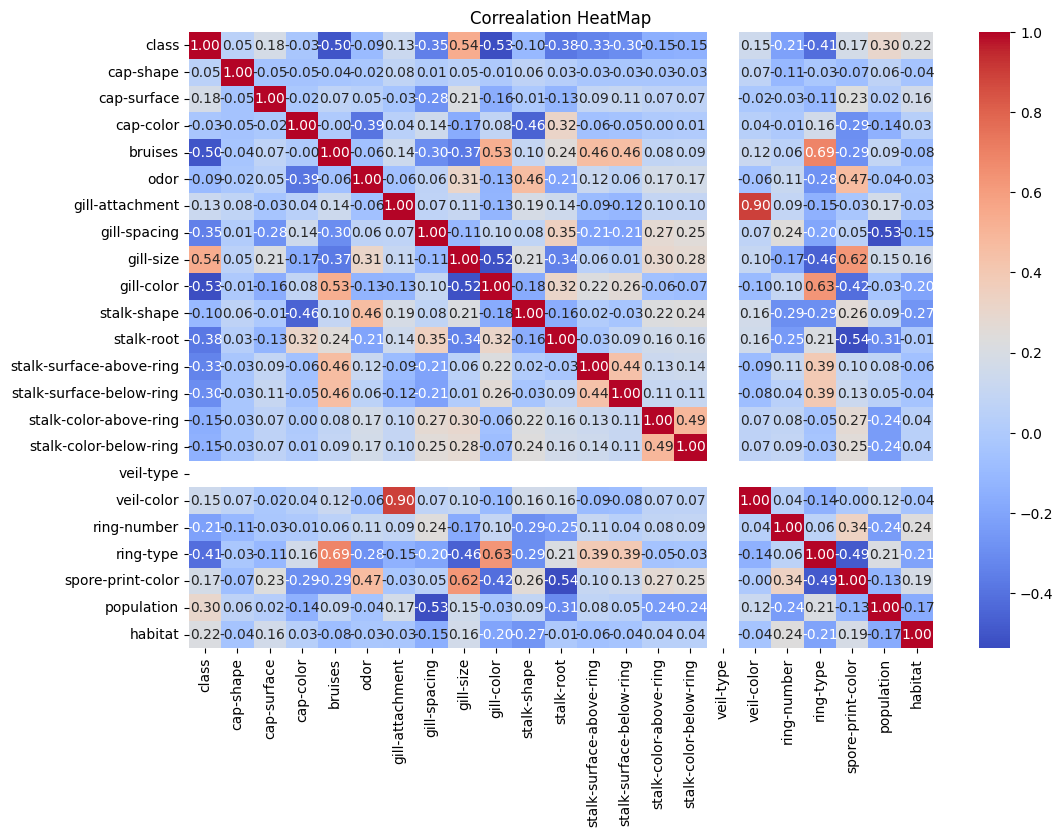

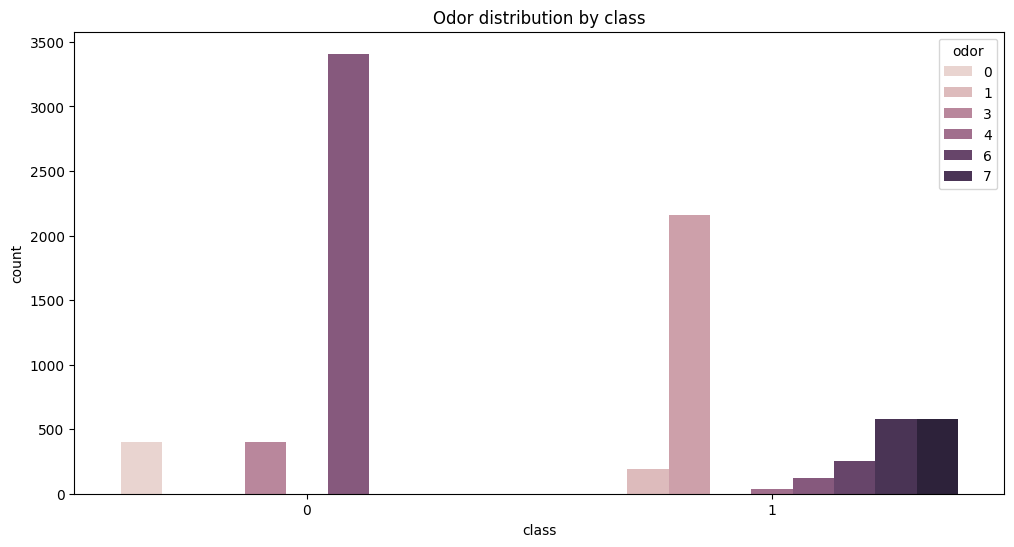

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("상관 관계 히트맵")
plt.title("Correalation HeatMap")
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='class', hue='odor')
plt.title("독성별 냄새 분포")
plt.title("Odor distribution by class")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

#feature와 label 값 분리
features = data.drop('class', axis=1)
labels = data['class']
features
labels



0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64

In [ ]:

# 데이터를 학습용과 테스트용으로 분할.

X_train, X_test, y_train, y_test  = train_test_split(features, labels, test_size=0.2, random_state=0)

# shape 확인
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6499, 22)
(1625, 22)
(6499,)
(1625,)


In [ ]:
#모델 학습 및 지표확인
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
#모델 생성
dt = DecisionTreeClassifier(random_state = 0, criterion= 'gini', max_depth= 3, min_samples_leaf = 2, min_samples_split = 2)
dt

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, random_state=0)

In [ ]:
#모델 학습
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, random_state=0)

In [ ]:
#예측
y_pred = dt.predict(X_test)
y_pred

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
print(f"정확도 : {accuracy_score(y_test, y_pred)}")

정확도 : 0.9606153846153846


In [ ]:
#교차검증
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt, features, labels, cv = 10)

In [ ]:
#교차 검증마다의 정확도 확인
for iter_count, accuracy in enumerate(scores):
    print(f"{iter_count + 1}번째 교차검증 정확도 : {accuracy}")

#평균정확도
print(f"평균 정확도 : {np.mean(scores)}")

1번째 교차검증 정확도 : 0.6752767527675276
2번째 교차검증 정확도 : 0.8634686346863468
3번째 교차검증 정확도 : 0.9790897908979089
4번째 교차검증 정확도 : 0.985239852398524
5번째 교차검증 정확도 : 0.9408866995073891
6번째 교차검증 정확도 : 0.9679802955665024
7번째 교차검증 정확도 : 1.0
8번째 교차검증 정확도 : 1.0
9번째 교차검증 정확도 : 0.8620689655172413
10번째 교차검증 정확도 : 0.9802955665024631
평균 정확도 : 0.9254306557843902


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


print("\nclassification_report:")
print(classification_report(y_test, y_pred))
print("\nconfusion_matrix:")
print(confusion_matrix(y_test, y_pred))



classification_report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       852
           1       0.94      0.98      0.96       773

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625


confusion_matrix:
[[806  46]
 [ 18 755]]


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#의사결정나무 생성
tree_model = DecisionTreeClassifier()

#튜닝할 하이퍼파라미터 그리드 설정
param_grid = {
    'criterion' : ['gini','entropy'], #불순도 계산에 사용할 기준, criterion : 분할기준
    'max_depth' : [None, 10, 20, 30], #트리의 최대 깊이
    'min_samples_split' : [2, 5, 10], #노드를 분할하기 위한 최소 샘플수
    'min_samples_leaf' : [1, 2, 4] #리프노드가 되기 위한 최소 샘플수
}

In [ ]:
#gridSearchCV 객체 생성
grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='accuracy')
grid_search

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [ ]:
#모델 훈련 및 최적의 파라미터 찾기
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [ ]:
#최적의 하이퍼파라미터와 성능 출력
print(f"최적의 하이퍼파라미터 : {grid_search.best_params_}")
print(f"최적의 성능 : {grid_search.best_score_}")

최적의 하이퍼파라미터 : {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
최적의 성능 : 1.0
